# Wind Data From NREL's WIND Toolkit
---
The **Techno-Economic WIND (Wind Integration National Dataset) Toolkit** (https://www.nrel.gov/grid/wind-toolkit.html) provides 5-min resolution data for 7 years, ranging from 2007 to 2013, at 120,000 points within the continental U.S. selected for their wind resource. This set contains power estimates and forecasts along with a subset of atmospheric variables. Data can be accessed via an API(https://developer.nrel.gov/docs/wind/wind-toolkit/).

In [1]:
from prereise.gather.winddata.te_wind import te_wind

## 1. Extract the siteIDs
Out of the 120,000 site data get the sites within the state WA

In [2]:
all_siteID_NREL  = te_wind.get_all_NREL_siteID_for_states(['WA'])

Retrieving nrel sites for WA
Got 1642 sites for WA


In [3]:
all_siteID_NREL.head()

,site_id,lat,lon,capacity,capacity_factor
0,121076,46.342697,-117.367416,16.0,0.316
1,121077,46.347599,-117.341385,16.0,0.289
2,121180,46.345894,-117.452621,10.0,0.376
3,121181,46.350815,-117.426590,14.0,0.376
4,121182,46.355736,-117.400574,16.0,0.351


## 2. Extract wind bus data
Get information from Westerninterconnet network.

In [4]:
from westernintnet.westernintnet import win_data

c:\program files\python\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading


In [5]:
wind_farm_bus = win_data.genbus.groupby('type').get_group('wind')

In [6]:
wind_farm_bus.head()

,busID,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,type,lat,lon,GenMWMax,GenMWMin,AreaNum,ZoneName,base_color
plantID,,,,,,,,,,,,,,,,,,,,,
7,10691,59.72,21.07,21.07,-14.24,1.0063,98.92,1,59.72,59.72,...,0.0,0.0000;,wind,45.813100,-120.347500,98.900002,16.648942,1,Washington,#15b01a
10,10699,79.42,-14.50,21.45,-14.50,1.0019,120.64,1,79.42,79.42,...,0.0,0.0000;,wind,47.135600,-120.687200,100.699997,13.150001,1,Washington,#15b01a
11,10703,136.30,25.92,29.03,-19.63,1.0605,174.64,1,136.30,136.30,...,0.0,0.0000;,wind,45.879700,-120.807200,136.300004,43.062568,1,Washington,#15b01a
38,10746,66.35,-12.96,19.17,-12.96,1.0205,98.26,1,66.35,66.35,...,0.0,0.0000;,wind,46.954700,-120.181900,89.999998,19.930001,1,Washington,#15b01a
52,10768,212.51,56.83,56.83,-38.42,1.0304,301.55,1,212.51,212.51,...,0.0,0.0000;,wind,46.421111,-118.026944,266.799998,122.148347,1,Washington,#15b01a


## 3. Find NREL site closest to wind farm from network

In [7]:
closest_NREL_siteID = te_wind.find_NREL_siteID_closest_to_windfarm(all_siteID_NREL, wind_farm_bus[['lat','lon']])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 243/243 [00:10<00:00, 22.39it/s]


In [8]:
closest_NREL_siteID.head()

,siteID,capacity,dist
plantID,,,
7,121408,16.0,27.069415
10,125504,14.0,59.431869
11,121930,16.0,224.840205
38,124942,16.0,64.160009
52,122079,10.0,289.906536


## 4. Define data range

In [9]:
data_start = te_wind.pd.Timestamp('2010-01-01')
data_end = te_wind.pd.Timestamp('2010-01-01 23:55:00')
data_range = te_wind.pd.date_range(data_start, data_end,freq = '5min')

## 5. Retrieve data from NREL server

In [10]:
%%capture
# suppress output because it is only suitable as terminal output

data = te_wind.get_data_from_NREL_server(closest_NREL_siteID, data_range);

In [11]:
import pprint
pprint.pprint(data)

{'2010-01': {119823:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  1.000000    0.815785
2010-01-01 00:05:00+00:00  1.000000    0.819790
2010-01-01 00:10:00+00:00  1.000000    0.830090
2010-01-01 00:15:00+00:00  1.000000    0.839434
2010-01-01 00:20:00+00:00  1.000000    0.844965
2010-01-01 00:25:00+00:00  1.000000    0.843630
2010-01-01 00:30:00+00:00  1.000000    0.837526
2010-01-01 00:35:00+00:00  1.000000    0.830469
2010-01-01 00:40:00+00:00  1.000000    0.826274
2010-01-01 00:45:00+00:00  1.000000    0.827800
2010-01-01 00:50:00+00:00  1.000000    0.844967
2010-01-01 00:55:00+00:00  1.000000    0.863277
2010-01-01 01:00:00+00:00  1.000000    0.876628
2010-01-01 01:05:00+00:00  1.000000    0.892077
2010-01-01 01:10:00+00:00  1.000000    0.901996
2010-01-01 01:15:00+00:00  1.000000    0.913059
2010-01-01 01:20:00+00:00  1.000000    0.923740
2010-01-01 01:25:00+00:00  1.000000    0.927936
2010-01-01 01:30:00

[288 rows x 2 columns],
             120843:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.002088    0.179676
2010-01-01 00:05:00+00:00  0.000893    0.162465
2010-01-01 00:10:00+00:00  0.000303    0.153971
2010-01-01 00:15:00+00:00  0.000453    0.156153
2010-01-01 00:20:00+00:00  0.000951    0.163344
2010-01-01 00:25:00+00:00  0.001389    0.169666
2010-01-01 00:30:00+00:00  0.001116    0.165748
2010-01-01 00:35:00+00:00  0.000784    0.160958
2010-01-01 00:40:00+00:00  0.000798    0.161178
2010-01-01 00:45:00+00:00  0.001357    0.169244
2010-01-01 00:50:00+00:00  0.002248    0.182109
2010-01-01 00:55:00+00:00  0.002640    0.187781
2010-01-01 01:00:00+00:00  0.003651    0.202392
2010-01-01 01:05:00+00:00  0.007815    0.230076
2010-01-01 01:10:00+00:00  0.009183    0.232903
2010-01-01 01:15:00+00:00  0.017144    0.249033
2010-01-01 01:20:00+00:00  0.027364    0.269738
2010-01-01 01:25:00+00:00  0.026808    0.26

[288 rows x 2 columns],
             121046:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.021326    0.253963
2010-01-01 00:05:00+00:00  0.015867    0.243062
2010-01-01 00:10:00+00:00  0.018822    0.248947
2010-01-01 00:15:00+00:00  0.011496    0.234341
2010-01-01 00:20:00+00:00  0.005010    0.219080
2010-01-01 00:25:00+00:00  0.010624    0.232592
2010-01-01 00:30:00+00:00  0.005178    0.221475
2010-01-01 00:35:00+00:00  0.003398    0.196188
2010-01-01 00:40:00+00:00  0.004364    0.209920
2010-01-01 00:45:00+00:00  0.004717    0.214933
2010-01-01 00:50:00+00:00  0.004301    0.209046
2010-01-01 00:55:00+00:00  0.004407    0.210573
2010-01-01 01:00:00+00:00  0.005020    0.219292
2010-01-01 01:05:00+00:00  0.004422    0.210790
2010-01-01 01:10:00+00:00  0.003547    0.198365
2010-01-01 01:15:00+00:00  0.003547    0.198365
2010-01-01 01:20:00+00:00  0.003837    0.202507
2010-01-01 01:25:00+00:00  0.004389    0.21

[288 rows x 2 columns],
             121058:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.032177    1.767070
2010-01-01 00:05:00+00:00  0.031582    1.760967
2010-01-01 00:10:00+00:00  0.027033    1.713666
2010-01-01 00:15:00+00:00  0.015597    1.594639
2010-01-01 00:20:00+00:00  0.015720    1.596165
2010-01-01 00:25:00+00:00  0.021105    1.652621
2010-01-01 00:30:00+00:00  0.011715    1.554965
2010-01-01 00:35:00+00:00  0.005286    1.478671
2010-01-01 00:40:00+00:00  0.005366    1.486291
2010-01-01 00:45:00+00:00  0.004054    1.365761
2010-01-01 00:50:00+00:00  0.002695    1.240654
2010-01-01 00:55:00+00:00  0.001784    1.156743
2010-01-01 01:00:00+00:00  0.000856    1.071302
2010-01-01 01:05:00+00:00  0.000840    1.069778
2010-01-01 01:10:00+00:00  0.000707    1.057588
2010-01-01 01:15:00+00:00  0.000000    0.927902
2010-01-01 01:20:00+00:00  0.000000    0.805846
2010-01-01 01:25:00+00:00  0.000000    0.84

[288 rows x 2 columns],
             121408:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.003987    0.185394
2010-01-01 00:05:00+00:00  0.002920    0.171662
2010-01-01 00:10:00+00:00  0.003999    0.185585
2010-01-01 00:15:00+00:00  0.005006    0.198554
2010-01-01 00:20:00+00:00  0.003808    0.183105
2010-01-01 00:25:00+00:00  0.004357    0.190162
2010-01-01 00:30:00+00:00  0.004848    0.196456
2010-01-01 00:35:00+00:00  0.004555    0.192644
2010-01-01 00:40:00+00:00  0.003977    0.185207
2010-01-01 00:45:00+00:00  0.004552    0.192644
2010-01-01 00:50:00+00:00  0.004801    0.195885
2010-01-01 00:55:00+00:00  0.011223    0.211905
2010-01-01 01:00:00+00:00  0.021581    0.230597
2010-01-01 01:05:00+00:00  0.023081    0.233269
2010-01-01 01:10:00+00:00  0.013374    0.215722
2010-01-01 01:15:00+00:00  0.012220    0.213623
2010-01-01 01:20:00+00:00  0.014443    0.217628
2010-01-01 01:25:00+00:00  0.015280    0.21

[288 rows x 2 columns],
             121471:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.002936    0.194039
2010-01-01 00:05:00+00:00  0.002068    0.181396
2010-01-01 00:10:00+00:00  0.000914    0.164613
2010-01-01 00:15:00+00:00  0.001349    0.170934
2010-01-01 00:20:00+00:00  0.001622    0.174860
2010-01-01 00:25:00+00:00  0.000272    0.155245
2010-01-01 00:30:00+00:00  0.001066    0.166795
2010-01-01 00:35:00+00:00  0.000108    0.152850
2010-01-01 00:40:00+00:00  0.000000    0.136283
2010-01-01 00:45:00+00:00  0.000000    0.144781
2010-01-01 00:50:00+00:00  0.000002    0.151320
2010-01-01 00:55:00+00:00  0.000000    0.133882
2010-01-01 01:00:00+00:00  0.000000    0.129955
2010-01-01 01:05:00+00:00  0.000000    0.121672
2010-01-01 01:10:00+00:00  0.000000    0.106633
2010-01-01 01:15:00+00:00  0.000000    0.101185
2010-01-01 01:20:00+00:00  0.000000    0.100748
2010-01-01 01:25:00+00:00  0.000000    0.09

[288 rows x 2 columns],
             121626:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.033266    0.251569
2010-01-01 00:05:00+00:00  0.034530    0.253861
2010-01-01 00:10:00+00:00  0.031668    0.248712
2010-01-01 00:15:00+00:00  0.039267    0.262445
2010-01-01 00:20:00+00:00  0.055317    0.282282
2010-01-01 00:25:00+00:00  0.055794    0.282857
2010-01-01 00:30:00+00:00  0.073072    0.301931
2010-01-01 00:35:00+00:00  0.074445    0.303459
2010-01-01 00:40:00+00:00  0.078242    0.307654
2010-01-01 00:45:00+00:00  0.081692    0.311468
2010-01-01 00:50:00+00:00  0.077712    0.307083
2010-01-01 00:55:00+00:00  0.073553    0.302503
2010-01-01 01:00:00+00:00  0.070952    0.299642
2010-01-01 01:05:00+00:00  0.073376    0.302313
2010-01-01 01:10:00+00:00  0.073906    0.302886
2010-01-01 01:15:00+00:00  0.058681    0.286101
2010-01-01 01:20:00+00:00  0.049848    0.276374
2010-01-01 01:25:00+00:00  0.053831    0.28

[288 rows x 2 columns],
             121774:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.081627    0.309577
2010-01-01 00:05:00+00:00  0.035561    0.254456
2010-01-01 00:10:00+00:00  0.014714    0.217073
2010-01-01 00:15:00+00:00  0.004327    0.188846
2010-01-01 00:20:00+00:00  0.002700    0.168056
2010-01-01 00:25:00+00:00  0.001520    0.152984
2010-01-01 00:30:00+00:00  0.001606    0.154122
2010-01-01 00:35:00+00:00  0.002673    0.167847
2010-01-01 00:40:00+00:00  0.004276    0.188440
2010-01-01 00:45:00+00:00  0.013655    0.215520
2010-01-01 00:50:00+00:00  0.003939    0.184051
2010-01-01 00:55:00+00:00  0.002098    0.160401
2010-01-01 01:00:00+00:00  0.001980    0.158876
2010-01-01 01:05:00+00:00  0.001608    0.154108
2010-01-01 01:10:00+00:00  0.000984    0.146098
2010-01-01 01:15:00+00:00  0.000687    0.142283
2010-01-01 01:20:00+00:00  0.000406    0.138658
2010-01-01 01:25:00+00:00  0.000688    0.14

[288 rows x 2 columns],
             122158:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.232422    0.438176
2010-01-01 00:05:00+00:00  0.488706    0.557844
2010-01-01 00:10:00+00:00  0.661587    0.625414
2010-01-01 00:15:00+00:00  0.746741    0.659195
2010-01-01 00:20:00+00:00  0.665604    0.627366
2010-01-01 00:25:00+00:00  0.519288    0.570039
2010-01-01 00:30:00+00:00  0.472332    0.551730
2010-01-01 00:35:00+00:00  0.464530    0.548674
2010-01-01 00:40:00+00:00  0.401695    0.524036
2010-01-01 00:45:00+00:00  0.266193    0.457546
2010-01-01 00:50:00+00:00  0.138186    0.377112
2010-01-01 00:55:00+00:00  0.084957    0.329376
2010-01-01 01:00:00+00:00  0.055317    0.302346
2010-01-01 01:05:00+00:00  0.048237    0.292755
2010-01-01 01:10:00+00:00  0.035778    0.273135
2010-01-01 01:15:00+00:00  0.021810    0.251119
2010-01-01 01:20:00+00:00  0.009651    0.231936
2010-01-01 01:25:00+00:00  0.005223    0.22

[288 rows x 2 columns],
             122512:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.003425    0.175097
2010-01-01 00:05:00+00:00  0.004865    0.192836
2010-01-01 00:10:00+00:00  0.009692    0.205427
2010-01-01 00:15:00+00:00  0.014191    0.211724
2010-01-01 00:20:00+00:00  0.013229    0.210390
2010-01-01 00:25:00+00:00  0.012403    0.209247
2010-01-01 00:30:00+00:00  0.013078    0.210200
2010-01-01 00:35:00+00:00  0.005264    0.197804
2010-01-01 00:40:00+00:00  0.012527    0.209434
2010-01-01 00:45:00+00:00  0.027116    0.229838
2010-01-01 00:50:00+00:00  0.037327    0.244140
2010-01-01 00:55:00+00:00  0.051226    0.263596
2010-01-01 01:00:00+00:00  0.091586    0.297358
2010-01-01 01:05:00+00:00  0.112254    0.314146
2010-01-01 01:10:00+00:00  0.137965    0.334367
2010-01-01 01:15:00+00:00  0.162465    0.348486
2010-01-01 01:20:00+00:00  0.134290    0.332089
2010-01-01 01:25:00+00:00  0.157470    0.34

[288 rows x 2 columns],
             124075:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.242962    0.671693
2010-01-01 00:05:00+00:00  0.291673    0.713201
2010-01-01 00:10:00+00:00  0.296052    0.716871
2010-01-01 00:15:00+00:00  0.313762    0.731825
2010-01-01 00:20:00+00:00  0.362066    0.763257
2010-01-01 00:25:00+00:00  0.378877    0.774246
2010-01-01 00:30:00+00:00  0.326273    0.740072
2010-01-01 00:35:00+00:00  0.278502    0.701927
2010-01-01 00:40:00+00:00  0.259997    0.686056
2010-01-01 00:45:00+00:00  0.249304    0.676899
2010-01-01 00:50:00+00:00  0.249651    0.677202
2010-01-01 00:55:00+00:00  0.257471    0.683914
2010-01-01 01:00:00+00:00  0.264210    0.689713
2010-01-01 01:05:00+00:00  0.274137    0.698257
2010-01-01 01:10:00+00:00  0.279090    0.702530
2010-01-01 01:15:00+00:00  0.289364    0.711381
2010-01-01 01:20:00+00:00  0.299650    0.720231
2010-01-01 01:25:00+00:00  0.304974    0.72

[288 rows x 2 columns],
             124440:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  1.000000    1.136269
2010-01-01 00:05:00+00:00  0.995309    1.060234
2010-01-01 00:10:00+00:00  0.981538    0.999202
2010-01-01 00:15:00+00:00  0.984233    1.010908
2010-01-01 00:20:00+00:00  0.993323    1.051335
2010-01-01 00:25:00+00:00  0.985568    1.017241
2010-01-01 00:30:00+00:00  0.966550    0.971718
2010-01-01 00:35:00+00:00  0.964118    0.968156
2010-01-01 00:40:00+00:00  0.966731    0.971968
2010-01-01 00:45:00+00:00  0.961458    0.964338
2010-01-01 00:50:00+00:00  0.959605    0.961790
2010-01-01 00:55:00+00:00  0.966202    0.971453
2010-01-01 01:00:00+00:00  0.981196    0.998150
2010-01-01 01:05:00+00:00  0.985419    1.016962
2010-01-01 01:10:00+00:00  0.984928    1.014922
2010-01-01 01:15:00+00:00  0.980250    0.994318
2010-01-01 01:20:00+00:00  0.987229    1.025095
2010-01-01 01:25:00+00:00  0.992450    1.04

[288 rows x 2 columns],
             124600:                            power  wind_speed
datetime                                    
2010-01-01 00:00:00+00:00    1.0    1.046791
2010-01-01 00:05:00+00:00    1.0    1.017228
2010-01-01 00:10:00+00:00    1.0    1.004252
2010-01-01 00:15:00+00:00    1.0    1.044877
2010-01-01 00:20:00+00:00    1.0    1.083793
2010-01-01 00:25:00+00:00    1.0    1.084369
2010-01-01 00:30:00+00:00    1.0    1.083033
2010-01-01 00:35:00+00:00    1.0    1.065675
2010-01-01 00:40:00+00:00    1.0    1.068726
2010-01-01 00:45:00+00:00    1.0    1.058807
2010-01-01 00:50:00+00:00    1.0    1.043548
2010-01-01 00:55:00+00:00    1.0    1.040498
2010-01-01 01:00:00+00:00    1.0    1.059569
2010-01-01 01:05:00+00:00    1.0    1.035151
2010-01-01 01:10:00+00:00    1.0    1.034965
2010-01-01 01:15:00+00:00    1.0    1.035726
2010-01-01 01:20:00+00:00    1.0    1.013224
2010-01-01 01:25:00+00:00    1.0    1.014937
2010-01-01 01:30:00+00:00    1.0    1.044118
2010-01-01

[288 rows x 2 columns],
             125107:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.024273    0.236905
2010-01-01 00:05:00+00:00  0.022910    0.234425
2010-01-01 00:10:00+00:00  0.020292    0.229657
2010-01-01 00:15:00+00:00  0.018413    0.226225
2010-01-01 00:20:00+00:00  0.017897    0.225271
2010-01-01 00:25:00+00:00  0.016228    0.222219
2010-01-01 00:30:00+00:00  0.014242    0.218595
2010-01-01 00:35:00+00:00  0.007944    0.207151
2010-01-01 00:40:00+00:00  0.004967    0.199141
2010-01-01 00:45:00+00:00  0.004731    0.196089
2010-01-01 00:50:00+00:00  0.004805    0.197042
2010-01-01 00:55:00+00:00  0.004746    0.196279
2010-01-01 01:00:00+00:00  0.004628    0.194753
2010-01-01 01:05:00+00:00  0.004761    0.196469
2010-01-01 01:10:00+00:00  0.004539    0.193607
2010-01-01 01:15:00+00:00  0.003935    0.185786
2010-01-01 01:20:00+00:00  0.003450    0.179491
2010-01-01 01:25:00+00:00  0.003316    0.17

[288 rows x 2 columns],
             125809:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.122996    0.320075
2010-01-01 00:05:00+00:00  0.223399    0.380345
2010-01-01 00:10:00+00:00  0.319379    0.425928
2010-01-01 00:15:00+00:00  0.331342    0.431271
2010-01-01 00:20:00+00:00  0.418275    0.467710
2010-01-01 00:25:00+00:00  0.554092    0.514450
2010-01-01 00:30:00+00:00  0.766371    0.588270
2010-01-01 00:35:00+00:00  0.923286    0.666849
2010-01-01 00:40:00+00:00  0.968781    0.715675
2010-01-01 00:45:00+00:00  0.982765    0.737612
2010-01-01 00:50:00+00:00  0.993729    0.773279
2010-01-01 00:55:00+00:00  0.998873    0.790064
2010-01-01 01:00:00+00:00  0.997497    0.785679
2010-01-01 01:05:00+00:00  1.000000    0.804181
2010-01-01 01:10:00+00:00  1.000000    0.831645
2010-01-01 01:15:00+00:00  1.000000    0.838511
2010-01-01 01:20:00+00:00  1.000000    0.858156
2010-01-01 01:25:00+00:00  1.000000    0.90

[288 rows x 2 columns],
             125853:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.812417    0.610328
2010-01-01 00:05:00+00:00  0.844239    0.626347
2010-01-01 00:10:00+00:00  0.881654    0.645025
2010-01-01 00:15:00+00:00  0.950470    0.698225
2010-01-01 00:20:00+00:00  0.982846    0.740176
2010-01-01 00:25:00+00:00  0.993712    0.775629
2010-01-01 00:30:00+00:00  0.993782    0.775805
2010-01-01 00:35:00+00:00  0.987586    0.755970
2010-01-01 00:40:00+00:00  0.981429    0.736150
2010-01-01 00:45:00+00:00  0.987316    0.755426
2010-01-01 00:50:00+00:00  1.000000    0.798529
2010-01-01 00:55:00+00:00  1.000000    0.825611
2010-01-01 01:00:00+00:00  1.000000    0.826757
2010-01-01 01:05:00+00:00  1.000000    0.847731
2010-01-01 01:10:00+00:00  1.000000    0.870425
2010-01-01 01:15:00+00:00  1.000000    0.879577
2010-01-01 01:20:00+00:00  1.000000    0.900374
2010-01-01 01:25:00+00:00  1.000000    0.91

[288 rows x 2 columns],
             126130:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.377418    0.455868
2010-01-01 00:05:00+00:00  0.411185    0.469976
2010-01-01 00:10:00+00:00  0.433571    0.477795
2010-01-01 00:15:00+00:00  0.450444    0.483706
2010-01-01 00:20:00+00:00  0.441514    0.480656
2010-01-01 00:25:00+00:00  0.453485    0.484855
2010-01-01 00:30:00+00:00  0.461669    0.487716
2010-01-01 00:35:00+00:00  0.454417    0.485233
2010-01-01 00:40:00+00:00  0.402361    0.467115
2010-01-01 00:45:00+00:00  0.399076    0.465781
2010-01-01 00:50:00+00:00  0.379231    0.457203
2010-01-01 00:55:00+00:00  0.316276    0.429742
2010-01-01 01:00:00+00:00  0.253805    0.402472
2010-01-01 01:05:00+00:00  0.244321    0.397515
2010-01-01 01:10:00+00:00  0.267740    0.408768
2010-01-01 01:15:00+00:00  0.306755    0.425931
2010-01-01 01:20:00+00:00  0.311916    0.428218
2010-01-01 01:25:00+00:00  0.279771    0.41

[288 rows x 2 columns],
             126200:                            power  wind_speed
datetime                                    
2010-01-01 00:00:00+00:00    0.0    0.091751
2010-01-01 00:05:00+00:00    0.0    0.092513
2010-01-01 00:10:00+00:00    0.0    0.096136
2010-01-01 00:15:00+00:00    0.0    0.095565
2010-01-01 00:20:00+00:00    0.0    0.099570
2010-01-01 00:25:00+00:00    0.0    0.096328
2010-01-01 00:30:00+00:00    0.0    0.098807
2010-01-01 00:35:00+00:00    0.0    0.093847
2010-01-01 00:40:00+00:00    0.0    0.082785
2010-01-01 00:45:00+00:00    0.0    0.080687
2010-01-01 00:50:00+00:00    0.0    0.077063
2010-01-01 00:55:00+00:00    0.0    0.072485
2010-01-01 01:00:00+00:00    0.0    0.066953
2010-01-01 01:05:00+00:00    0.0    0.064855
2010-01-01 01:10:00+00:00    0.0    0.072864
2010-01-01 01:15:00+00:00    0.0    0.077823
2010-01-01 01:20:00+00:00    0.0    0.068286
2010-01-01 01:25:00+00:00    0.0    0.061420
2010-01-01 01:30:00+00:00    0.0    0.074387
2010-01-01

[288 rows x 2 columns],
             126288:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.390711    0.609023
2010-01-01 00:05:00+00:00  0.370000    0.597068
2010-01-01 00:10:00+00:00  0.367857    0.595799
2010-01-01 00:15:00+00:00  0.398960    0.613843
2010-01-01 00:20:00+00:00  0.422809    0.625276
2010-01-01 00:25:00+00:00  0.325624    0.571374
2010-01-01 00:30:00+00:00  0.167361    0.464598
2010-01-01 00:35:00+00:00  0.052177    0.350462
2010-01-01 00:40:00+00:00  0.029641    0.308772
2010-01-01 00:45:00+00:00  0.024564    0.299365
2010-01-01 00:50:00+00:00  0.032404    0.313856
2010-01-01 00:55:00+00:00  0.036220    0.320975
2010-01-01 01:00:00+00:00  0.028350    0.306483
2010-01-01 01:05:00+00:00  0.022707    0.296056
2010-01-01 01:10:00+00:00  0.037686    0.323760
2010-01-01 01:15:00+00:00  0.046075    0.339265
2010-01-01 01:20:00+00:00  0.034933    0.318669
2010-01-01 01:25:00+00:00  0.035207    0.31

[288 rows x 2 columns],
             126477:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  1.000000    0.810825
2010-01-01 00:05:00+00:00  0.995669    0.792133
2010-01-01 00:10:00+00:00  0.989104    0.770579
2010-01-01 00:15:00+00:00  0.982666    0.749408
2010-01-01 00:20:00+00:00  0.969062    0.727856
2010-01-01 00:25:00+00:00  0.943308    0.699819
2010-01-01 00:30:00+00:00  0.935746    0.691619
2010-01-01 00:35:00+00:00  0.928701    0.683989
2010-01-01 00:40:00+00:00  0.921149    0.675786
2010-01-01 00:45:00+00:00  0.908840    0.667585
2010-01-01 00:50:00+00:00  0.884703    0.655378
2010-01-01 00:55:00+00:00  0.859430    0.642598
2010-01-01 01:00:00+00:00  0.815644    0.620472
2010-01-01 01:05:00+00:00  0.749070    0.592244
2010-01-01 01:10:00+00:00  0.694119    0.572790
2010-01-01 01:15:00+00:00  0.635464    0.551999
2010-01-01 01:20:00+00:00  0.613433    0.544178
2010-01-01 01:25:00+00:00  0.573783    0.53

[288 rows x 2 columns],
             126496:                            power  wind_speed
datetime                                    
2010-01-01 00:00:00+00:00    1.0    0.953321
2010-01-01 00:05:00+00:00    1.0    0.971824
2010-01-01 00:10:00+00:00    1.0    0.987845
2010-01-01 00:15:00+00:00    1.0    1.011305
2010-01-01 00:20:00+00:00    1.0    1.029231
2010-01-01 00:25:00+00:00    1.0    1.052497
2010-01-01 00:30:00+00:00    1.0    1.081679
2010-01-01 00:35:00+00:00    1.0    1.106666
2010-01-01 00:40:00+00:00    1.0    1.129551
2010-01-01 00:45:00+00:00    1.0    1.160258
2010-01-01 00:50:00+00:00    1.0    1.196115
2010-01-01 00:55:00+00:00    1.0    1.214044
2010-01-01 01:00:00+00:00    1.0    1.230827
2010-01-01 01:05:00+00:00    1.0    1.253713
2010-01-01 01:10:00+00:00    1.0    1.282130
2010-01-01 01:15:00+00:00    1.0    1.301011
2010-01-01 01:20:00+00:00    1.0    1.305779
2010-01-01 01:25:00+00:00    1.0    1.304252
2010-01-01 01:30:00+00:00    1.0    1.289759
2010-01-01

[288 rows x 2 columns],
             126515:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.982108    0.732250
2010-01-01 00:05:00+00:00  0.987362    0.749224
2010-01-01 00:10:00+00:00  0.987889    0.750937
2010-01-01 00:15:00+00:00  0.984992    0.741593
2010-01-01 00:20:00+00:00  0.988706    0.753608
2010-01-01 00:25:00+00:00  0.981916    0.731674
2010-01-01 00:30:00+00:00  0.981029    0.728817
2010-01-01 00:35:00+00:00  0.985448    0.743121
2010-01-01 00:40:00+00:00  0.988628    0.753416
2010-01-01 00:45:00+00:00  0.986495    0.746550
2010-01-01 00:50:00+00:00  0.985362    0.742929
2010-01-01 00:55:00+00:00  0.984112    0.738925
2010-01-01 01:00:00+00:00  0.983747    0.737781
2010-01-01 01:05:00+00:00  0.984627    0.740641
2010-01-01 01:10:00+00:00  0.987220    0.749032
2010-01-01 01:15:00+00:00  0.986146    0.745597
2010-01-01 01:20:00+00:00  0.985826    0.744641
2010-01-01 01:25:00+00:00  0.983497    0.73

[288 rows x 2 columns],
             126548:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.807178    0.606285
2010-01-01 00:05:00+00:00  0.819476    0.612386
2010-01-01 00:10:00+00:00  0.820964    0.613146
2010-01-01 00:15:00+00:00  0.781127    0.593878
2010-01-01 00:20:00+00:00  0.724059    0.574039
2010-01-01 00:25:00+00:00  0.681255    0.559159
2010-01-01 00:30:00+00:00  0.620407    0.537984
2010-01-01 00:35:00+00:00  0.528153    0.506132
2010-01-01 00:40:00+00:00  0.472748    0.487062
2010-01-01 00:45:00+00:00  0.504815    0.498126
2010-01-01 00:50:00+00:00  0.525792    0.505375
2010-01-01 00:55:00+00:00  0.578211    0.523495
2010-01-01 01:00:00+00:00  0.595726    0.529600
2010-01-01 01:05:00+00:00  0.581848    0.524828
2010-01-01 01:10:00+00:00  0.561785    0.517961
2010-01-01 01:15:00+00:00  0.539992    0.510522
2010-01-01 01:20:00+00:00  0.535511    0.508994
2010-01-01 01:25:00+00:00  0.552116    0.51

[288 rows x 2 columns]}}


## 6. Convert output to desired format

In [12]:
%%capture
# suppress output because it is only suitable as terminal output

[power,wind_speed] = te_wind.dict_to_DataFrame(data, data_range, closest_NREL_siteID)

In [13]:
power.head()

siteID,121408,125504,121930,124942,122079,124075,121405,121700,121765,121471,...,126548,126288,126515,126525,126504,126496,126488,126566,124440,126518
2010-01-01 00:00:00,0.003987,0.400584,0.0,0.032172,0.229368,0.242962,0.0,0.081190,0.172802,0.002936,...,0.807178,0.390711,0.982108,1.0,0.610969,1.0,0.002729,1.0,1.000000,0.583700
2010-01-01 00:05:00,0.002920,0.380317,0.0,0.031004,0.302882,0.291673,0.0,0.089027,0.176255,0.002068,...,0.819476,0.370000,0.987362,1.0,0.592443,1.0,0.003152,1.0,0.995309,0.683376
2010-01-01 00:10:00,0.003999,0.366210,0.0,0.034504,0.343416,0.296052,0.0,0.096500,0.172483,0.000914,...,0.820964,0.367857,0.987889,1.0,0.598825,1.0,0.003757,1.0,0.981538,0.708765
2010-01-01 00:15:00,0.005006,0.361330,0.0,0.040765,0.364482,0.313762,0.0,0.107642,0.197135,0.001349,...,0.781127,0.398960,0.984992,1.0,0.598059,1.0,0.004361,1.0,0.984233,0.674218
2010-01-01 00:20:00,0.003808,0.352501,0.0,0.044649,0.374238,0.362066,0.0,0.142644,0.237211,0.001622,...,0.724059,0.422809,0.988706,1.0,0.629280,1.0,0.004512,1.0,0.993323,0.661484


c:\program files\python\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


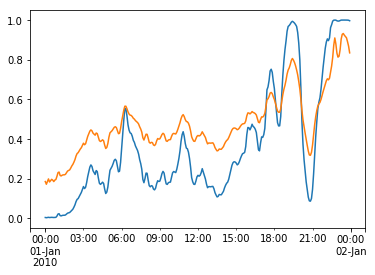

In [14]:
power[121408].plot()
wind_speed[121408].plot()

## 7. Scale power output according to wind farm capacity

In [15]:
wind_farm_power_series_hourly = te_wind.scale_power_to_plant_capacity(power, wind_farm_bus, closest_NREL_siteID)

In [16]:
wind_farm_power_series_hourly.head()

,7,10,11,38,52,68,73,85,132,151,...,2391,2404,2405,2406,2420,2421,2431,2432,2461,2463
2010-01-01 00:00:00,0.478303,33.605445,0.0,3.341240,95.509883,30.770337,0.048025,22.969752,11.226378,0.043073,...,0.246276,106.500006,9.7,9.6,8.996837,9.996485,9.770529,9.770529,103.499997,138.255174
2010-01-01 01:00:00,1.943735,24.206566,0.0,4.645477,19.361727,34.725381,1.985658,27.438406,8.323553,0.000000,...,0.614102,106.500006,9.7,9.6,8.893553,9.881726,9.862698,9.862698,103.499997,178.046884
2010-01-01 02:00:00,8.503778,9.466036,0.0,3.837972,0.251889,53.729526,9.098427,26.663486,7.206191,0.060599,...,1.001003,106.066263,9.7,9.6,7.956605,8.840672,9.991620,9.991620,103.078472,167.419555
2010-01-01 03:00:00,21.194265,5.843719,0.0,3.731842,6.220193,61.184579,16.667660,48.538608,10.290147,0.489429,...,2.283144,103.705160,9.7,9.6,7.513870,8.348744,10.000000,10.000000,100.783879,187.220803
2010-01-01 04:00:00,17.505488,2.463715,0.0,3.407813,25.407308,56.334383,17.816369,38.847648,9.722603,0.735519,...,3.198927,101.024063,9.7,9.6,8.655024,9.616694,10.000000,10.000000,98.178307,188.999999


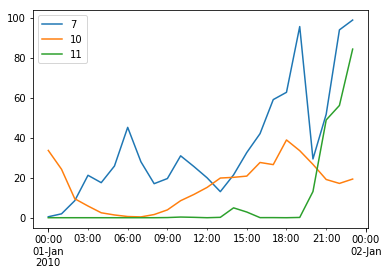

In [17]:
wind_farm_power_series_hourly[[7,10,11]].plot()